<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-libraries-and-datasets-and-write-user-defined-functions" data-toc-modified-id="Import-required-libraries-and-datasets-and-write-user-defined-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required libraries and datasets and write user-defined functions</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Department" data-toc-modified-id="Department-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Department</a></span></li><li><span><a href="#Region" data-toc-modified-id="Region-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Region</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Recruitment-Channel" data-toc-modified-id="Recruitment-Channel-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Recruitment Channel</a></span></li><li><span><a href="#No-of-Trainings" data-toc-modified-id="No-of-Trainings-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>No of Trainings</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Previous-Year-Rating" data-toc-modified-id="Previous-Year-Rating-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Previous Year Rating</a></span></li><li><span><a href="#Length-of-Service" data-toc-modified-id="Length-of-Service-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Length of Service</a></span></li><li><span><a href="#KPIs-met-&gt;-80%?" data-toc-modified-id="KPIs-met->-80%?-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>KPIs met &gt; 80%?</a></span></li><li><span><a href="#Awards-Won" data-toc-modified-id="Awards-Won-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Awards Won</a></span></li><li><span><a href="#Average-Training-Score" data-toc-modified-id="Average-Training-Score-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Average Training Score</a></span></li></ul></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Manipulation</a></span><ul class="toc-item"><li><span><a href="#Dummify-categorical-variables" data-toc-modified-id="Dummify-categorical-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummify categorical variables</a></span></li><li><span><a href="#Divide-into-train-and-test" data-toc-modified-id="Divide-into-train-and-test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Divide into train and test</a></span></li><li><span><a href="#Scale-numerical-columns" data-toc-modified-id="Scale-numerical-columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Scale numerical columns</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Accuracy-Score" data-toc-modified-id="Accuracy-Score-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Accuracy Score</a></span></li><li><span><a href="#Classification-Report" data-toc-modified-id="Classification-Report-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Classification Report</a></span></li><li><span><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ROC-AUC</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Model-Scoring" data-toc-modified-id="Model-Scoring-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Model Scoring</a></span></li></ul></li></ul></div>

### Import required libraries and datasets and write user-defined functions

In [1]:
# Import required libraries
import swifter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import distributed.joblib

In [2]:
# Selective imports
from itertools import product
from dask.distributed import Client
from IPython.display import display_html, HTML
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

In [3]:
# Set up client and options
%matplotlib inline
client = Client()
palette = sns.cubehelix_palette()

In [4]:
def plot_dist(df, var, target, dist='cat'):
    '''Seaborn categorical plotting function facetting on target variable'''
    if dist == 'cat':
        plot = sns.catplot(x=var, col=target, data=df, palette=palette, kind='count')
        plot.set_xticklabels(rotation=90);
    elif dist == 'num':
        plot = sns.boxplot(y=var, x=target, data=df, palette=palette)

In [5]:
def plot_confusion_matrix( cm, normalize=False, cmap=plt.cm.Accent):
        '''
        This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
        '''
        classes = [0, 1]

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Confusion matrix with normalization'

        else:
            title = 'Confusion matrix without normalization'

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [6]:
def roc_plot( fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

In [7]:
def plot_roc_curve( y_train_true, train_pred_prob, y_test_true, test_pred_prob, *args):
    '''
    Generates roc plot for train and test and superimposes them
    '''

    AUC_Train = roc_auc_score(y_train_true, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_true, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_true, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(
            y_test_true, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_true, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(
            y_test_true, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [8]:
# Read the dataset
df = pd.read_csv('../data/raw/train_LZdllcl.csv', low_memory=False, encoding='latin1')
validation = pd.read_csv('../data/raw/test_2umaH9m.csv', low_memory=False, encoding='latin1')

In [9]:
# Print the dimensions
print('Shape of the training data is :', df.shape)
print('Shape of the validation data is :', validation.shape)

Shape of the training data is : (54808, 14)
Shape of the validation data is : (23490, 13)


In [10]:
# Print the first few rows
print('Head of the training data is :\n')
df.head(3)

Head of the training data is :



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


### Exploratory Data Analysis

#### Department

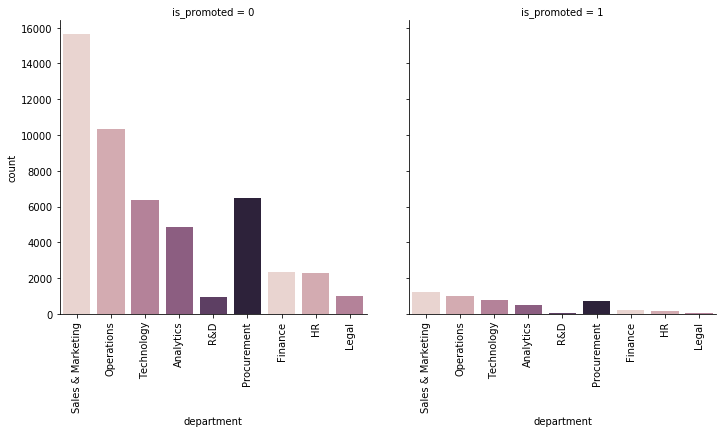

In [11]:
plot_dist(df, 'department', 'is_promoted')

#### Region

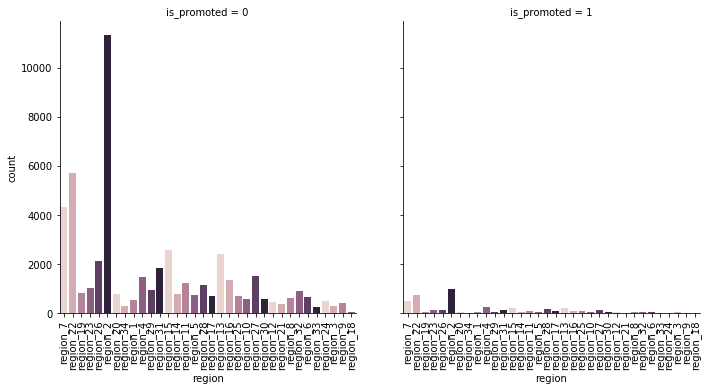

In [12]:
plot_dist(df, 'region', 'is_promoted')

#### Education

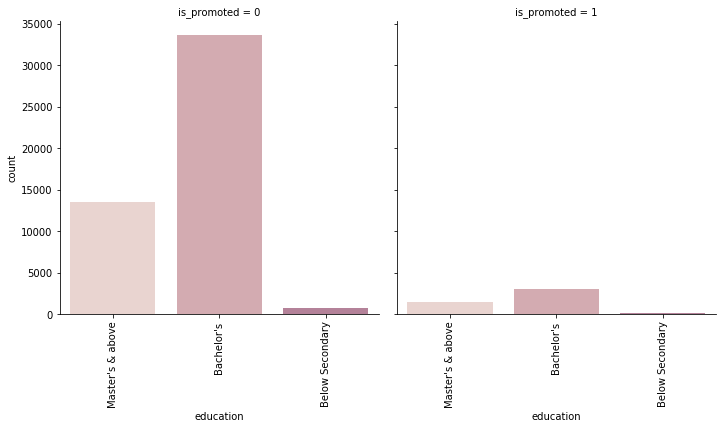

In [13]:
plot_dist(df, 'education', 'is_promoted')

#### Gender

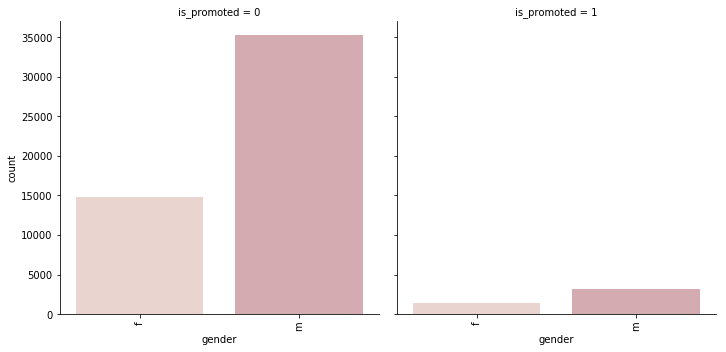

In [14]:
plot_dist(df, 'gender', 'is_promoted')

#### Recruitment Channel

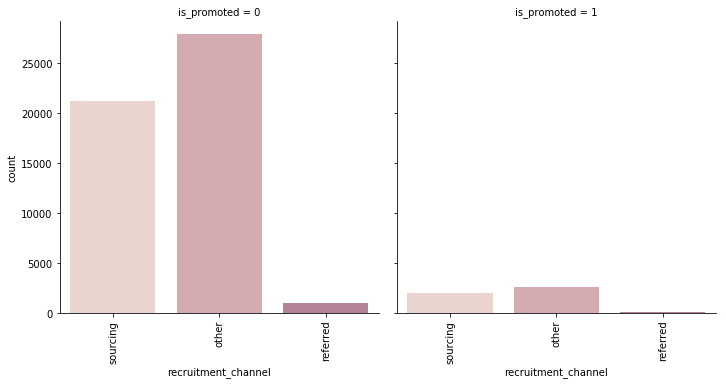

In [15]:
plot_dist(df, 'recruitment_channel', 'is_promoted')

#### No of Trainings

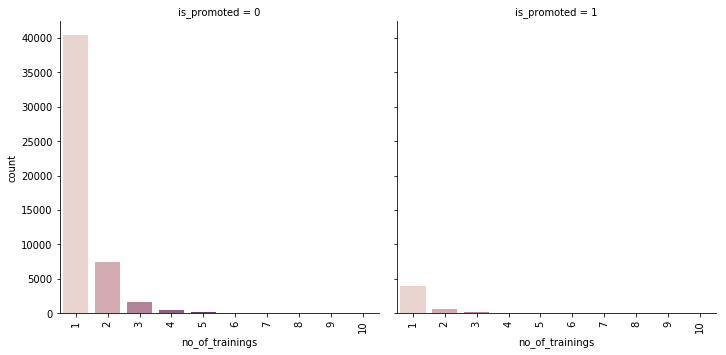

In [16]:
plot_dist(df, 'no_of_trainings', 'is_promoted')

#### Age

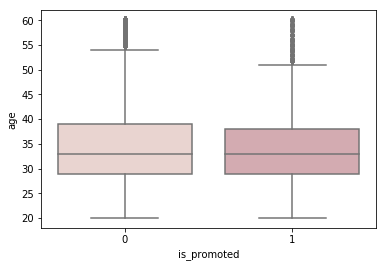

In [17]:
plot_dist(df, 'age', 'is_promoted', 'num')

#### Previous Year Rating

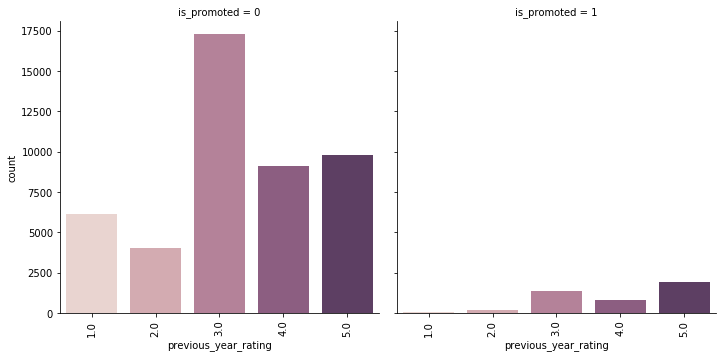

In [18]:
plot_dist(df, 'previous_year_rating', 'is_promoted')

#### Length of Service

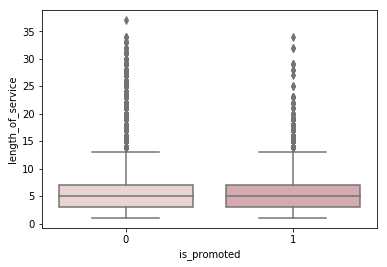

In [19]:
plot_dist(df, 'length_of_service', 'is_promoted', 'num')

#### KPIs met > 80%?

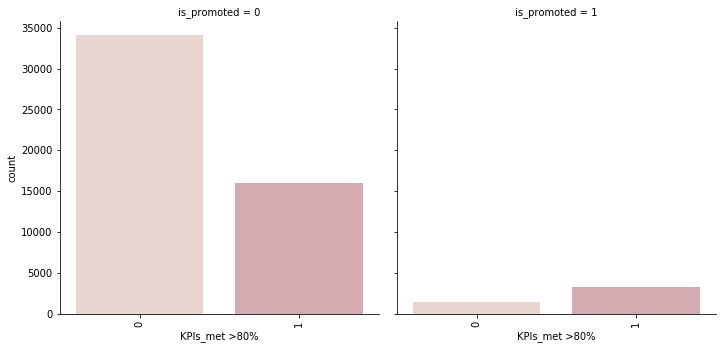

In [20]:
plot_dist(df, 'KPIs_met >80%', 'is_promoted')

#### Awards Won

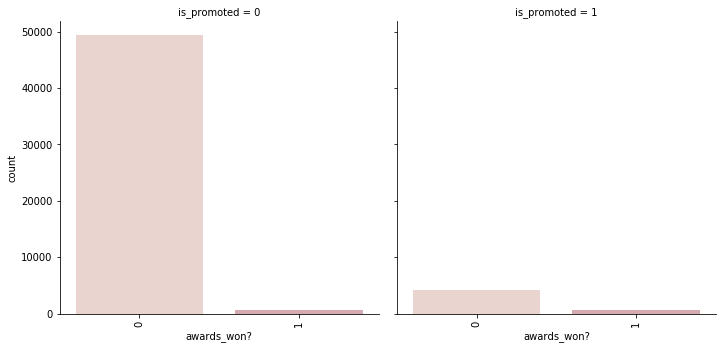

In [21]:
plot_dist(df, 'awards_won?', 'is_promoted')

#### Average Training Score

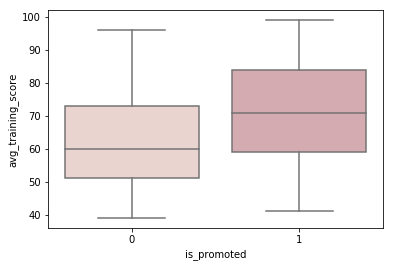

In [22]:
plot_dist(df, 'avg_training_score', 'is_promoted', 'num')

### Data Manipulation

In [23]:
# Categortical columns
cat_cols = ['department', 
            'region', 
            'education', 
            'gender', 
            'recruitment_channel', 
            'previous_year_rating', 
            'KPIs_met >80%', 
            'awards_won?']

# Numerical columns
num_cols = ['no_of_trainings', 
            'age', 
            'length_of_service', 
            'avg_training_score']

# Target columns
target_cols = ['employee_id', 'is_promoted']

#### Dummify categorical variables

In [24]:
# Dummify data 
df = pd.get_dummies(data=df, columns=cat_cols, dummy_na=True, drop_first=True)
validation = pd.get_dummies(data=validation, columns=cat_cols, dummy_na=True, drop_first=True)

In [25]:
# Print the dimensions
print('Shape of the training data is :', df.shape)
print('Shape of the validation data is :', validation.shape)

Shape of the training data is : (54808, 66)
Shape of the validation data is : (23490, 65)


In [26]:
# Print the first few rows
print('Head of the dataframe is :\n')
df.head(3)

Head of the dataframe is :



,employee_id,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_nan,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_nan,KPIs_met >80%_1.0,KPIs_met >80%_nan,awards_won?_1.0,awards_won?_nan
0,65438,1,35,8,49,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,65141,1,30,4,60,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,7513,1,34,7,50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Divide into train and test

In [27]:
X = df.copy().drop(target_cols, axis=1)
y = df[target_cols]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [29]:
X_valid = validation.copy().drop('employee_id', axis=1)

In [30]:
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (43846, 64)
Shape of X_test :  (10962, 64)
Shape of y_train :  (43846, 2)
Shape of y_test :  (10962, 2)


#### Scale numerical columns

In [31]:
for i in num_cols:
    mean = X_train[i].mean()
    std = X_train[i].std()
    X_train[i] = X_train[i].swifter.apply(lambda x : ((x-mean)/std))
    X_test[i] = X_test[i].swifter.apply(lambda x : ((x-mean)/std))
    X_valid[i] = X_valid[i].swifter.apply(lambda x : ((x-mean)/std))

### Modelling

In [32]:
params = dict(max_features=['auto', 'sqrt', 'log2'], 
              max_depth=[3, 5, 7, 9], 
              n_estimators=[100, 200, 500, 1000, 1500])
# Fit for train
model = RandomForestClassifier(class_weight='balanced', random_state=1)
grid = GridSearchCV(model, 
                    params, 
                    n_jobs=-1, 
                    cv=5, 
                    scoring='f1', 
                    verbose=2)

grid.fit(X_train, y_train['is_promoted'])

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV] . max_depth=3, max_features=auto, n_estimators=100, total=   2.4s
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV] . max_depth=3, max_features=auto, n_estimators=100, total=   2.4s
[CV] . max_depth=3, max_features=auto, n_estimators=100, total=   2.4s
[CV] max_depth=3, max_features=auto, n_estimators=200 ................
[CV] max_depth=3, max_features=auto, n_estimators=200 ................
[CV] . max_depth=3, max_features=auto, n_estimators=100, total=   2.4s
[CV] max_depth=3, max_features=auto, n_estimators=200 ................
[CV] . max_depth=3, max_features=auto, n_estimators=100, total=   2.5s
[CV] max_depth=

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min


[CV] . max_depth=3, max_features=sqrt, n_estimators=200, total=   4.7s
[CV] max_depth=3, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=3, max_features=sqrt, n_estimators=500, total=  11.4s
[CV] max_depth=3, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=3, max_features=sqrt, n_estimators=500, total=  11.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=500 ................
[CV]  max_depth=3, max_features=auto, n_estimators=1500, total=  36.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=1000 ...............
[CV] . max_depth=3, max_features=sqrt, n_estimators=500, total=  11.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=1000 ...............
[CV] . max_depth=3, max_features=sqrt, n_estimators=500, total=  11.2s
[CV] max_depth=3, max_features=sqrt, n_estimators=1000 ...............
[CV] . max_depth=3, max_features=sqrt, n_estimators=500, total=  11.2s
[CV] max_depth=3, max_features=sqrt, n_estimators=1000 ...............
[CV]  

[CV]  max_depth=5, max_features=auto, n_estimators=1000, total=  36.4s
[CV] max_depth=5, max_features=auto, n_estimators=1500 ...............
[CV]  max_depth=5, max_features=auto, n_estimators=1000, total=  36.6s
[CV] max_depth=5, max_features=auto, n_estimators=1500 ...............
[CV]  max_depth=5, max_features=auto, n_estimators=1000, total=  31.8s
[CV] max_depth=5, max_features=auto, n_estimators=1500 ...............
[CV]  max_depth=5, max_features=auto, n_estimators=1000, total=  30.6s
[CV] max_depth=5, max_features=auto, n_estimators=1500 ...............
[CV]  max_depth=5, max_features=auto, n_estimators=1500, total=  46.7s
[CV] max_depth=5, max_features=auto, n_estimators=1500 ...............
[CV]  max_depth=5, max_features=auto, n_estimators=1500, total=  46.6s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=5, max_features=sqrt, n_estimators=100, total=   3.1s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV] .

[CV] . max_depth=7, max_features=auto, n_estimators=100, total=   4.2s
[CV] max_depth=7, max_features=auto, n_estimators=100 ................
[CV] . max_depth=7, max_features=auto, n_estimators=100, total=   4.2s
[CV] max_depth=7, max_features=auto, n_estimators=100 ................
[CV] . max_depth=7, max_features=auto, n_estimators=100, total=   4.1s
[CV] max_depth=7, max_features=auto, n_estimators=200 ................
[CV] . max_depth=7, max_features=auto, n_estimators=100, total=   4.0s
[CV] max_depth=7, max_features=auto, n_estimators=200 ................
[CV] . max_depth=7, max_features=auto, n_estimators=200, total=   8.1s
[CV]  max_depth=5, max_features=log2, n_estimators=1500, total=  40.4s
[CV] max_depth=7, max_features=auto, n_estimators=200 ................
[CV] max_depth=7, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.0min


[CV] . max_depth=7, max_features=auto, n_estimators=200, total=   8.2s
[CV] max_depth=7, max_features=auto, n_estimators=200 ................
[CV] . max_depth=7, max_features=auto, n_estimators=200, total=   8.0s
[CV] max_depth=7, max_features=auto, n_estimators=500 ................
[CV] . max_depth=7, max_features=auto, n_estimators=200, total=   8.0s
[CV] max_depth=7, max_features=auto, n_estimators=500 ................
[CV] . max_depth=7, max_features=auto, n_estimators=200, total=   8.0s
[CV] max_depth=7, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=log2, n_estimators=1500, total=  41.0s
[CV] max_depth=7, max_features=auto, n_estimators=500 ................
[CV] . max_depth=7, max_features=auto, n_estimators=500, total=  22.2s
[CV] max_depth=7, max_features=auto, n_estimators=500 ................
[CV] . max_depth=7, max_features=auto, n_estimators=500, total=  22.1s
[CV] max_depth=7, max_features=auto, n_estimators=1000 ...............
[CV] .

[CV] . max_depth=7, max_features=log2, n_estimators=500, total=  16.7s
[CV] max_depth=7, max_features=log2, n_estimators=1000 ...............
[CV] . max_depth=7, max_features=log2, n_estimators=500, total=  16.9s
[CV] max_depth=7, max_features=log2, n_estimators=1000 ...............
[CV]  max_depth=7, max_features=log2, n_estimators=1000, total=  34.5s
[CV] max_depth=7, max_features=log2, n_estimators=1000 ...............
[CV]  max_depth=7, max_features=log2, n_estimators=1000, total=  34.7s
[CV] max_depth=7, max_features=log2, n_estimators=1500 ...............
[CV]  max_depth=7, max_features=log2, n_estimators=1000, total=  34.4s
[CV] max_depth=7, max_features=log2, n_estimators=1500 ...............
[CV]  max_depth=7, max_features=log2, n_estimators=1000, total=  34.1s
[CV] max_depth=7, max_features=log2, n_estimators=1500 ...............
[CV]  max_depth=7, max_features=log2, n_estimators=1000, total=  41.2s
[CV] max_depth=7, max_features=log2, n_estimators=1500 ...............
[CV]  

[CV]  max_depth=9, max_features=sqrt, n_estimators=1500, total= 1.2min
[CV] max_depth=9, max_features=log2, n_estimators=100 ................
[CV]  max_depth=9, max_features=sqrt, n_estimators=1500, total= 1.2min
[CV] max_depth=9, max_features=log2, n_estimators=100 ................
[CV] . max_depth=9, max_features=log2, n_estimators=100, total=   4.2s
[CV] max_depth=9, max_features=log2, n_estimators=100 ................
[CV] . max_depth=9, max_features=log2, n_estimators=100, total=   4.2s
[CV] max_depth=9, max_features=log2, n_estimators=100 ................
[CV] . max_depth=9, max_features=log2, n_estimators=100, total=   4.2s
[CV] max_depth=9, max_features=log2, n_estimators=100 ................
[CV] . max_depth=9, max_features=log2, n_estimators=100, total=   4.2s
[CV] max_depth=9, max_features=log2, n_estimators=200 ................
[CV] . max_depth=9, max_features=log2, n_estimators=100, total=   4.1s
[CV] max_depth=9, max_features=log2, n_estimators=200 ................
[CV] .

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 5, 7, 9], 'n_estimators': [100, 200, 500, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [33]:
joblib.dump(model, '../models/rf_f1.pickle')

['../models/rf_f1.pickle']

### Model Evaluation

In [34]:
model = grid.best_estimator_

In [35]:
# Training predictions
train_pred = model.predict(X_train)

# Testing predictions
test_pred = model.predict(X_test)

#### Accuracy Score

In [36]:
# Accuracy Score
print('Accuracy score for Train data is : ',
      accuracy_score(y_train['is_promoted'], train_pred))
print('Accuracy score for Test data is : ',
      accuracy_score(y_test['is_promoted'], test_pred))

Accuracy score for Train data is :  0.713520047438763
Accuracy score for Test data is :  0.7039773763911695


#### Classification Report

In [37]:
# Classification Report
print('\nClassification report for Train data is : \n',
      classification_report(y_train['is_promoted'], train_pred))
print('Classification report for Test data is : \n',
      classification_report(y_test['is_promoted'], test_pred))


Classification report for Train data is : 
              precision    recall  f1-score   support

          0       0.98      0.70      0.82     40121
          1       0.21      0.87      0.34      3725

avg / total       0.92      0.71      0.78     43846

Classification report for Test data is : 
              precision    recall  f1-score   support

          0       0.98      0.69      0.81     10019
          1       0.20      0.84      0.33       943

avg / total       0.91      0.70      0.77     10962



#### ROC-AUC

Train AUC =  0.8774486640998228
Test AUC =  0.8519088387419154


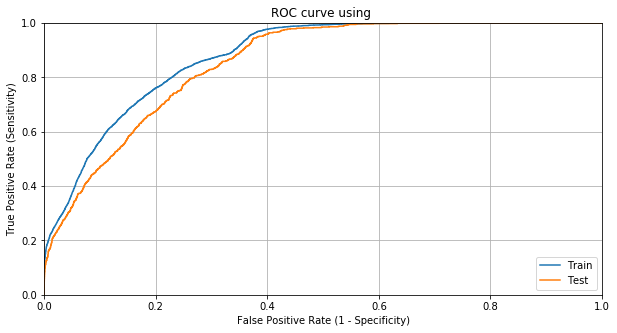

In [38]:
# ROC-AUC
plt.subplots(figsize=(10, 5))
train_prob = model.predict_proba(X_train)[:, 1]
test_prob = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_train['is_promoted'], train_prob,
                    y_test['is_promoted'], test_prob)

#### Confusion Matrix

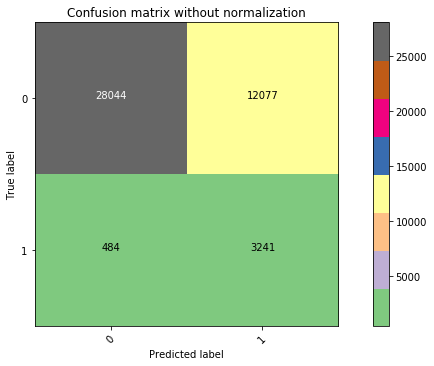

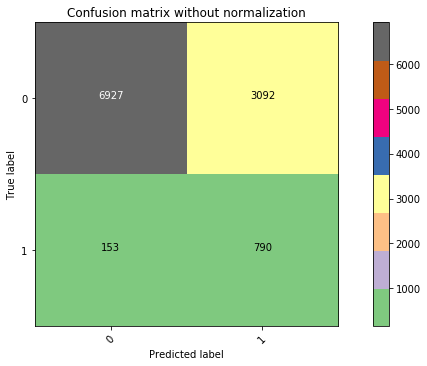

In [39]:
# Confusion matrices
plt.subplots(figsize=(10,5))
plot_confusion_matrix(confusion_matrix(
    y_train['is_promoted'], train_pred), normalize=False)

plt.subplots(figsize=(10,5))
plot_confusion_matrix(confusion_matrix(
    y_test['is_promoted'], test_pred), normalize=False)

#### Model Scoring

In [40]:
predictions = model.predict(X_valid)

In [41]:
emp_ids = validation['employee_id'].tolist()
results = pd.DataFrame({'employee_id' : emp_ids, 'is_promoted' : predictions})
results.to_csv('../data/processed/submission.csv', index=None)